# Ex 1

In this first exercise, we are going to guide you through several experiments on a dataset almost identical to the previous one. 


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

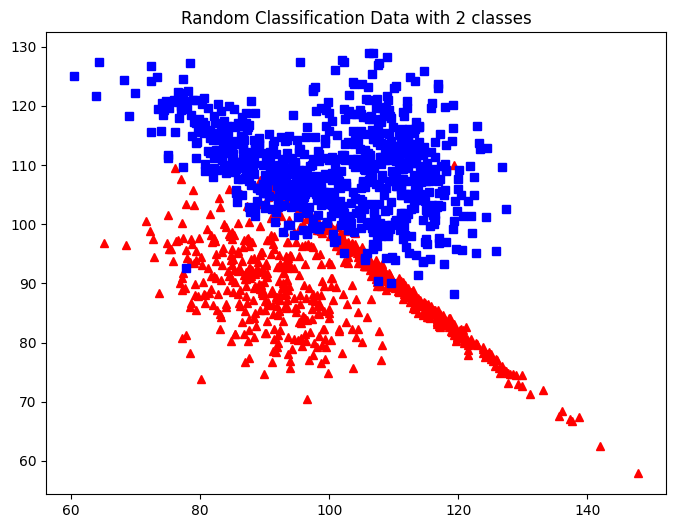

In [23]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(123)
X, y = datasets.make_classification(n_samples=1500, n_features=2, random_state=123, n_redundant= 0, scale=10, shift=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123)


# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.title('Random Classification Data with 2 classes')

## Ex1.1

Create a MLP called $model_1$ with two layers:

1.   one input layer with 2 neurons and relu as activation function. 
2.   one output layer.

Then, train it for 5 epochs, batch size = 16 and a validation set of 25%. 


In [24]:
from tensorflow.python.framework.random_seed import set_random_seed
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# Configuration options
feature_vector_length = 2 
num_classes = 2 

# categorization
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model = Sequential() #we first define how the "model" looks like
model.add(Dense(input_dim = feature_vector_length, units=2 , activation='relu')) #input layer
model.add(Dense(units = num_classes, activation='softmax')) #output layer

# see how the model looks like
model.summary()

# Configure the model
model.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history = model.fit(X_train, y_train_cat, epochs=5, batch_size=16, verbose=1, validation_split=0.25)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 2)                 6         
                                                                 
 dense_19 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
57/57 [==============================] - 1s 7ms/step - loss: 0.6885 - accuracy: 0.5411 - val_loss: 0.6406 - val_accuracy: 0.6033
Epoch 2/5
57/57 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5622 - val_loss: 0.6922 - val_accuracy: 0.5233
Epoch 3/5
57/57 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5089 - val_loss: 0.6923 - val_accuracy: 0.5233
Epoch 4/5
57/57 [====================

## Ex 1.2

Plot both accuracy and loss curves.

Answer the following:

1.   Is there any underfitting / overfitting problem?
2.   How is then training curve shape? 



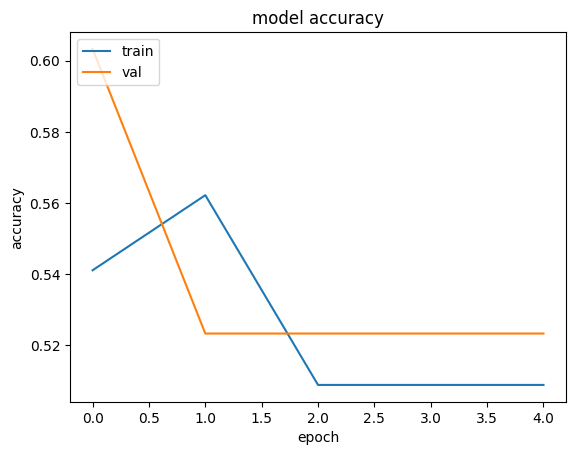

0.6033333539962769


In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()
print(max(history.history['val_accuracy']))

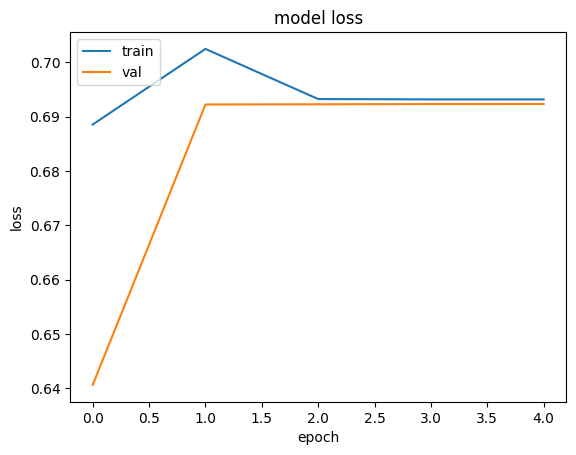

In [26]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The training loss function does not improve over the epochs, and this is reflected by the poor accuracy in both training and validation sets (i.e., 0.50 and 0.52, respectively).

Considering that the dataset is balanced over the two target classes, the model is just randomly guessing. The model is *underfitted* and not able to learn any useful information from the data. Usually, we might try two ways to address or mitigat the problem:
1.   Inspect our data. We need to verify that our data is in a ''*good shape*'' for a machine learning model. 
2.   Increase the model complexity. Our model might be just too simple for the task.

## Ex 1.3

We move temporarily into an important aspect: *knowing our data*. When working with a dataset, try to answer to the following:


1.   Is the ground truth balanced among the classes?
2.   What are the properties of the input features? For each feature, you can understand the following: is it defined in the discrete or continuous domain? how is it distributed? For example, print the minimum and maximum values for each feature.

Based on the answers, we can "improve" our training strategy. 




In [27]:
# balance/unbalance
from collections import Counter

Counter(y)

Counter({1: 751, 0: 749})

The ground truth is completely balanced. Let's see how the features looks like. 

In [28]:
# we can first get the min / max of each feature
print(X.min(axis = 0))
print(X.max(axis = 0))
print(X.mean(axis = 0 ))

[60.49042767 57.90438737]
[147.87156388 128.88776401]
[100.25169621  99.74419228]


This might be an issue: Neural Networks are trained with optimizers based on the gradient. 
This implies that the optimization might not be efficient when the features are not defined in small ranges (i.e., [-1, 1]). 

## Ex 1.4

We can try to now improve our model by scaling the features. Use a standard scaler, create a new MLP $model_2$ and train it with the same configurations (architecture, training strategy) as done for $model_1$. 

In [29]:
from sklearn.preprocessing import StandardScaler 

# define a scaler
tmp = X_test
scaler = StandardScaler()
scaler.fit(X_train) # remember, always training! 
X_train_scl = scaler.transform(X_train)
X_test_scl = scaler.transform(X_test)


# seed 
np.random.seed(123)
set_random_seed(2)

# Create the model
model2 = Sequential() #we first define how the "model" looks like
model2.add(Dense(input_dim = feature_vector_length, units=2 , activation='relu')) #input layer
model2.add(Dense(num_classes, activation='softmax')) #output layer

model2.summary()

# Configure the model and start training
model2.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history2 = model2.fit(X_train_scl, y_train_cat, epochs=5, verbose=1, validation_split=0.25)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 6         
                                                                 
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
29/29 [==============================] - 1s 12ms/step - loss: 0.5572 - accuracy: 0.8133 - val_loss: 0.5139 - val_accuracy: 0.8233
Epoch 2/5
29/29 [==============================] - 0s 4ms/step - loss: 0.5265 - accuracy: 0.8389 - val_loss: 0.4876 - val_accuracy: 0.8333
Epoch 3/5
29/29 [==============================] - 0s 3ms/step - loss: 0.5016 - accuracy: 0.8467 - val_loss: 0.4642 - val_accuracy: 0.8567
Epoch 4/5
29/29 [===================

Now we do some plots to check the accuracy and loss of the latest model and finally compare it with the previous one.

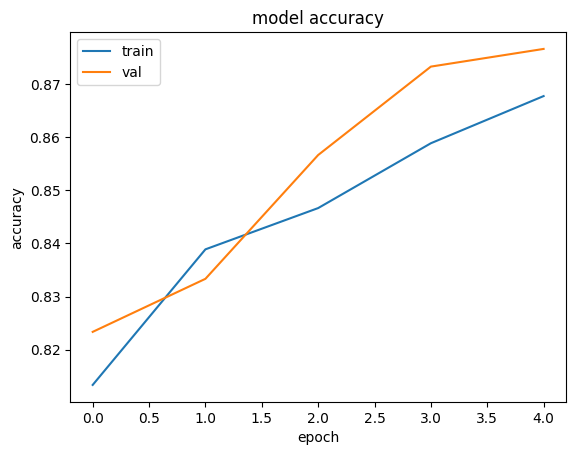

In [30]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

Let's now plot the loss of our latest model on the train and validation sets. 

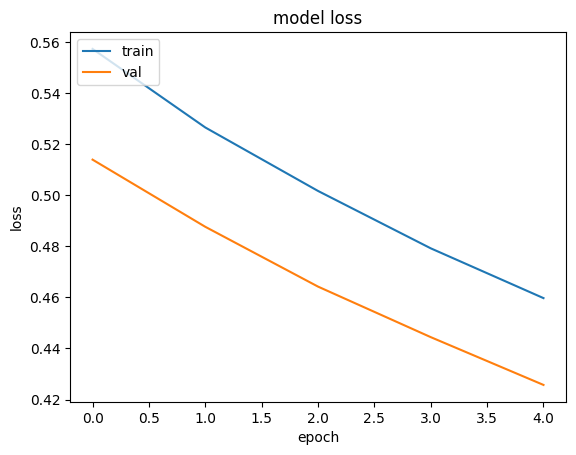

In [31]:
# summarize history for accuracy
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()


## Ex1.5

Let's now compare the performance of the two models on the validation set. Although we get a lower accuracy on the validation set than before, it improves "regularly" using the scaled dataset. Maybe if we keep training it will keep improving? \

For example, we can train a new MLP $model_3$ for 50 epochs. 
Print loss and accuracy curves, and then visually analyze them. Again, use the same configuration as $model_1$.


In [32]:
#seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model3 = Sequential() #we first define how the "model" looks like
model3.add(Dense(input_dim = feature_vector_length, units=2 , activation='relu')) #input layer
model3.add(Dense(num_classes, activation='softmax')) #output layer

#see how the model looks like
model3.summary()

# Configure the model and start training
model3.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history3 = model3.fit(X_train_scl, y_train_cat, epochs=50, verbose=1, validation_split=0.25)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 2)                 6         
                                                                 
 dense_23 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
29/29 [==============================] - 1s 8ms/step - loss: 0.8680 - accuracy: 0.0844 - val_loss: 0.8229 - val_accuracy: 0.1033
Epoch 2/50
29/29 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.1433 - val_loss: 0.7483 - val_accuracy: 0.1833
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.7158 - accuracy: 0.2878 - val_loss: 0.6999 - val_accuracy: 0.4200
Epoch 4/50
29/29 [===============

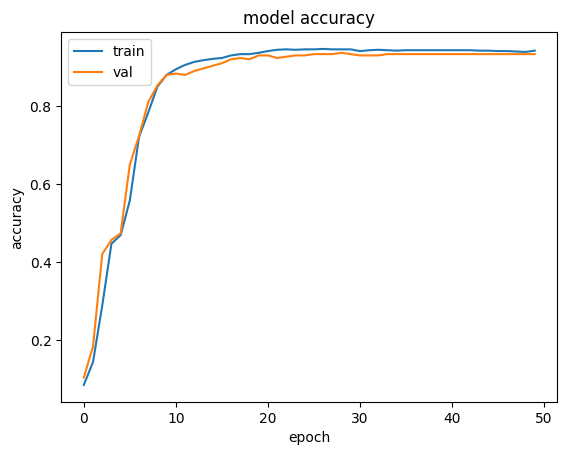

In [33]:
# summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

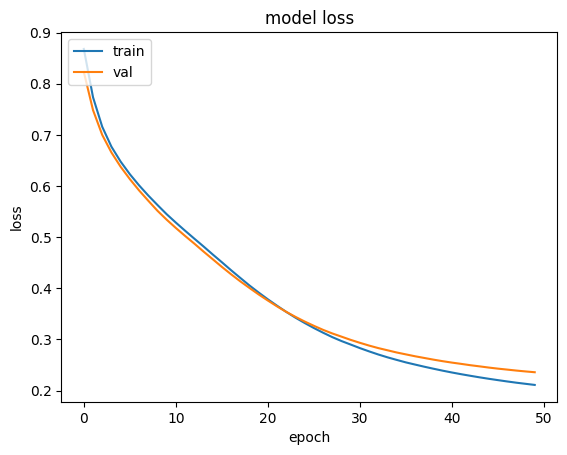

In [34]:
# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

The charts show some common training trends. For example, let's consider the loss:


1.   In the early stages (epoch 1 - 5), there is a phase where the model performance improve quickly. 
2.   From epoch 6 to 15, there is a stabilization trend, where the model improves at a lower rate, and it might seem that the training is almost done. Then there is a new phase of improvement. 
3.   After epoch 30, the loss does not improve much, and the loss decreases very slowly.


## Ex 1.6

We can save our time by introducing an **early stopping mechanism** <a href = "https://keras.io/api/callbacks/early_stopping/"> [link] </a>. 
For example, during the training, if the model validation loss does not improve 
for 3 epochs, we decide to stop. 
In this way, we can even set the number of epochs to 10000. 

Define a fourth MLP $model_4$ with the early stopping mechanism with patience = 3 (number of epochs with no improvement after which we stop the trainin process). Use the same configuration of $model_1$.
Train the model for 500 epochs, and then plot the accuracy and loss curves.



In [35]:
from keras.callbacks import EarlyStopping

# simple early stopping
es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 3, #number of epochs with no improvement
                   verbose=1)

#seed
np.random.seed(123)
set_random_seed(2)

# Create the model
model4 = Sequential() #we first define how the "model" looks like
model4.add(Dense(input_dim = feature_vector_length, units=2 , activation='relu')) #input layer
model4.add(Dense(num_classes, activation='softmax')) #output layer

#see how the model looks like
model4.summary()

# Configure the model and start training
model4.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric

#train our model
history4 = model4.fit(X_train_scl, y_train_cat, epochs=500, verbose=0, validation_split=0.25, callbacks=[es])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 6         
                                                                 
 dense_25 (Dense)            (None, 2)                 6         
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________
Epoch 172: early stopping


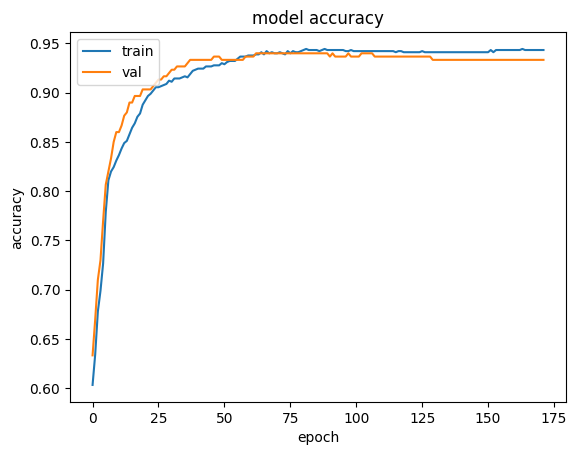

In [36]:
# summarize history for accuracy
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

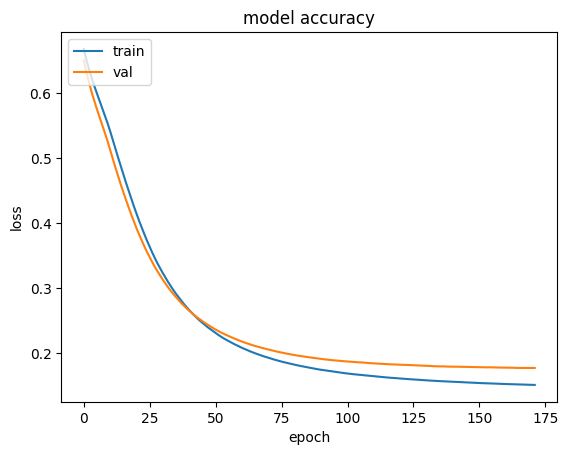

In [37]:
# summarize history for accuracy
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0.8, 1)
plt.show()

We created so far $4$ models, with four different training strategy, but the same architecture. We can now which model is actually the best on the testing set.

Remember: the fourth seems the best based on the validation accuracy and loss.

In [38]:
# see the testing performance of 
test_results = model.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

# see the testing performance
test_results = model2.evaluate(X_test_scl, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

# see the testing performance
test_results = model3.evaluate(X_test_scl, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

# see the testing performance
test_results = model4.evaluate(X_test_scl, y_test_cat, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

10/10 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4533
Test results - Loss: 0.6956629157066345 - Accuracy: 0.4533333480358124%
10/10 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8400
Test results - Loss: 0.4308342933654785 - Accuracy: 0.8399999737739563%
10/10 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9267
Test results - Loss: 0.2212277203798294 - Accuracy: 0.9266666769981384%
10/10 [==============================] - 0s 3ms/step - loss: 0.1740 - accuracy: 0.9300
Test results - Loss: 0.17400136590003967 - Accuracy: 0.9300000071525574%


## Ex 1.7 

Create a function that, given the number of layers, creates a NN. 
Here, we set the number of neurons to 2 for all hidden layers, and activation function as relu. The output layer's number of neurons depend on the number of classes we use, while the activation function is a softmax. 

In [39]:
def MLP_definer(n_layers, input_size, n_classes, activation_f):
    # seed
    np.random.seed(123)
    set_random_seed(2)
    
    # define a sequential model
    model = Sequential()

    if n_layers == 1: #input layer
        model.add(Dense(units = n_classes, input_dim = input_size, activation= 'softmax'))
    else:
        #input layer
        model.add(Dense(units = 2, input_dim = input_size, activation= activation_f))
        for i in range(2, n_layers): #hidden layer
            model.add(Dense(units = 2, activation = activation_f))
        
        #output layer
        model.add(Dense(units = n_classes, activation= 'softmax'))
    
    # Configure the model and start training
    model.compile(loss='categorical_crossentropy', #loss metric
              optimizer='sgd',  #optimizer
              metrics=['accuracy']) #displayed metric
    
    # model.summary()
    return model

## Ex 1.8 

Let's now consider the number of layers (not counting the input and output ones) of the network as a hyperparameter. 

Using the function you just defined in the previous exercise, implement a grid-search among different number of layers (from 1 to 4). \
Remember to use the earlystopping mechanism with patience=5. \
Print both training and validation accuracies.

In [40]:
nlayers = [1, 2, 3, 4]

es = EarlyStopping(monitor='val_loss', #quantity to be monitored
                   mode='min', #we look for decreasing patterns stop 
                   patience = 5, #number of epochs with no improvement
                   verbose=1)

for nl in nlayers:
    #create the MLP
    m = MLP_definer(n_layers= nl, input_size=2, n_classes= 2, activation_f= 'relu')

    #train our model
    h = m.fit(X_train_scl, y_train_cat, epochs=500, 
                     batch_size=16, verbose=0, validation_split=0.25, 
                     callbacks=[es])
    
    print(f"N layers:{nl}\t\tTrain ACC:{h.history['accuracy'][-1]:.8f}\tVal ACC:{h.history['val_accuracy'][-1]:.8f}")


Epoch 155: early stopping
N layers:1		Train ACC:0.94333333	Val ACC:0.93333334
Epoch 56: early stopping
N layers:2		Train ACC:0.94666666	Val ACC:0.93333334
Epoch 99: early stopping
N layers:3		Train ACC:0.94333333	Val ACC:0.93333334
Epoch 99: early stopping
N layers:4		Train ACC:0.94888890	Val ACC:0.93000001


# Ex 2

Try and get good performances on the *wine_dataset*.

In [41]:
from sklearn.datasets import load_wine #load our target dataset

#load the dataset
dataset = load_wine()

#extract X and y
X = dataset.data
y = dataset.target

#split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, random_state = 123) 